<a href="https://colab.research.google.com/github/mjohnsonperimeter/cosmology_2019/blob/master/SN_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install camb

     |████████████████████████████████| 32.0MB 139kB/s 
  Created wheel for camb: filename=camb-1.1.0-cp36-none-any.whl size=912758 sha256=6fe4e39edf8ee30d4b3955fc52a711ff3ee735ba031bc848d8bf5b2dac9ca0dc
  Stored in directory: /root/.cache/pip/wheels/52/d0/76/aea0e7192efbc373eaec579a4d18909518a90a6cc10f07625b
Successfully built camb


In [2]:
import urllib
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sys, platform, os
import camb

urllib.request.urlretrieve(url = "https://www.dropbox.com/s/js3vsjtbeirnd7y/SCPUnion2.1_mu_vs_z.txt?dl=1",filename = "SCPUnion2.1_mu_vs_z.txt")

('SCPUnion2.1_mu_vs_z.txt', <http.client.HTTPMessage at 0x7f3afc3ea780>)

In [0]:
z_data=np.loadtxt(fname = 'SCPUnion2.1_mu_vs_z.txt',usecols=(1))
mag_data=np.loadtxt(fname = 'SCPUnion2.1_mu_vs_z.txt',usecols=(2))
error_data=np.loadtxt(fname = 'SCPUnion2.1_mu_vs_z.txt',usecols=(3))

In [0]:
# Hubble constant in km/s/Mpc
H_0 = 67.5
# baryon and cdm fraction multiplied by h^2
omega_bh2 = 0.0224
omega_ch2 = 0.120
# Curvature
omega_k = 0.0
# Neutrino mass
nu_mass = 0.06

# Set within CAMB
pars = camb.CAMBparams()
pars.set_cosmology(H0=H_0, ombh2=omega_bh2, omch2=omega_ch2, mnu=nu_mass, omk=omega_k)
results = camb.get_background(pars)

z = np.linspace(0.01,1.5,100)
DL = results.luminosity_distance(z)
DL_lowz = ((2.99e5)/H_0)*z
dm = 5.*np.log10(DL/(1e-5))
dm_lowz = 5.*np.log10(DL_lowz/(1e-5))

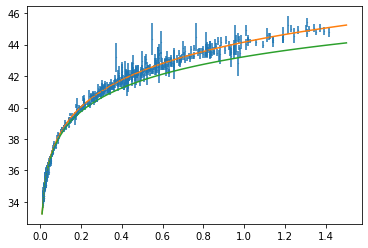

In [5]:
plt.errorbar(z_data,mag_data,error_data,fmt='o',ms=.25)
plt.plot(z,dm)
plt.plot(z,dm_lowz)

<ErrorbarContainer object of 3 artists>

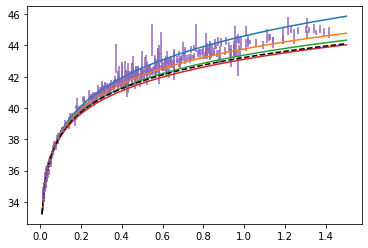

In [5]:
# Hubble constant in km/s/Mpc
H_0 = 67.5
# baryon and cdm fraction multiplied by h^2
omega_bh2 = 0.0224
omega_ch2 = 0.120
# Curvature
omega_k = 0.0
# Neutrino mass
nu_mass = 0.06

# Set within CAMB

DL_lowz = ((2.99e5)/H_0)*z
dm_lowz = 5.*np.log10(DL_lowz/(1e-5))

pars = camb.CAMBparams()
z = np.linspace(0.01,1.5,100)
omegas = np.linspace(0,.9,4)

for omega_ch2 in omegas:

  pars.set_cosmology(H0=H_0, ombh2=omega_bh2, omch2=omega_ch2, mnu=nu_mass, omk=omega_k)
  results = camb.get_background(pars)
  DL = results.luminosity_distance(z)
  dm = 5.*np.log10(DL/(1e-5))
  plt.plot(z,dm)

plt.plot(z,dm_lowz,'k--')
plt.errorbar(z_data,mag_data,error_data,fmt='o',ms=.25)

In [0]:
# Hubble constant in km/s/Mpc
H_0 = 67.5
# baryon and cdm fraction multiplied by h^2
omega_bh2 = 0.0224
omega_ch2 = 0.120
# Curvature
omega_k = 0.0
# Neutrino mass
nu_mass = 0.06

omega_matter = results.get_Omega('cdm', 0.0001)+results.get_Omega('baryon', 0.0001)
omega_rad = results.get_Omega('photon', 0.0001)+3.*results.get_Omega('nu', 0.0001)
omega_DE = results.get_Omega('de', 0.0001)

q0 = (omega_rad + 0.5*omega_matter - omega_DE)

# Set within CAMB
pars = camb.CAMBparams()
pars.set_cosmology(H0=H_0, ombh2=omega_bh2, omch2=omega_ch2, mnu=nu_mass, omk=omega_k)
results = camb.get_background(pars)

z = np.linspace(0.01,1.5,100)
DL = results.luminosity_distance(z)
DL_lowz = ((2.99e5)/H_0)*z*(1+(1-q0)*z*0.5)
dm = 5.*np.log10(DL/(1e-5))
dm_lowz = 5.*np.log10(DL_lowz/(1e-5))

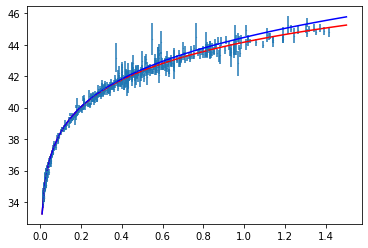

In [9]:
plt.errorbar(z_data,mag_data,error_data,fmt='o',ms=.25)
plt.plot(z,dm,'r')
plt.plot(z,dm_lowz,'b')

In [10]:
print(q0)

-0.5252983952175369


In [0]:
# Hubble constant in km/s/Mpc
H_0 = 67.5
# baryon and cdm fraction multiplied by h^2
omega_bh2 = 0.0224
omega_ch2 = 0.120
# Curvature
omega_k = 0.0
# Neutrino mass
nu_mass = 0.06

pars = camb.CAMBparams()
omegas = np.linspace(0.1,.2,500)
r2=np.zeros(omegas.shape[0])
i=0

for omega_ch2 in omegas:
  pars.set_cosmology(H0=H_0, ombh2=omega_bh2, omch2=omega_ch2, mnu=nu_mass, omk=omega_k)
  results = camb.get_background(pars)
  DL = results.luminosity_distance(z_data)
  dm = 5.*np.log10(DL/(1e-5))
  r2[i] = np.sum((dm - mag_data)**2/error_data**2)
  i+=1



In [0]:
def deriv(x,y,x0,dx):
  h = x[x0]-x[x0+dx]
  return (y[x0-dx]-y[x0-dx])/(2.*h)

def deriv2(x,y,x0,dx):
  h = x[x0]-x[x0+dx]
  return (y[x0-dx]-2.*y[x0]+y[x0-dx])/(h**2)

minindex = np.argmin(r2)
d2 = deriv2(omegas,r2,minindex,2)
r2approx = r2[minindex]*np.ones(omegas.shape[0]) + 0.5*d2*(omegas-omegas[minindex])**2

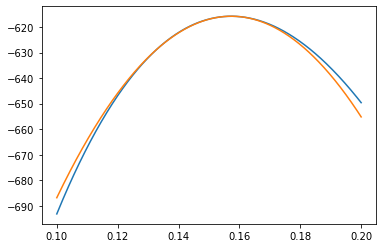

In [56]:
plt.plot(omegas,-r2)
plt.plot(omegas,-r2approx)

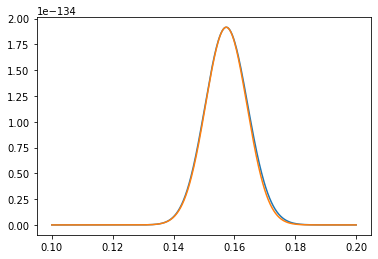

In [57]:
plt.plot(omegas,np.exp(-r2/2.))
plt.plot(omegas,np.exp(-r2approx/2.))

In [52]:
1./np.sqrt(0.5*d2)

0.0068007202606017985

In [0]:
import scipy.optimize as optimization

In [0]:
def dm_func(zs, omega_ch2s):
  pars.set_cosmology(H0=H_0, ombh2=omega_bh2, omch2=omega_ch2s, mnu=nu_mass, omk=omega_k)
  results = camb.get_background(pars)
  DL = results.luminosity_distance(zs)
  dm = 5.*np.log10(DL/(1e-5))
  return dm

In [11]:
dm_func(z,.120)

array([33.2540608 , 35.27248159, 36.31797674, 37.03326665, 37.5799999 ,
       38.02406823, 38.39890399, 38.72382511, 39.01101076, 39.26863765,
       39.50246315, 39.71669559, 39.91450525, 40.09834058, 40.27013249,
       40.43143101, 40.58349971, 40.72738245, 40.86395181, 40.99394482,
       41.11798981, 41.23662697, 41.35032423, 41.45948968, 41.56448148,
       41.66561574, 41.76317299, 41.85740332, 41.94853073, 42.03675666,
       42.122263  , 42.20521455, 42.28576112, 42.36403936, 42.44017426,
       42.51428047, 42.58646343, 42.65682034, 42.72544104, 42.7924087 ,
       42.85780055, 42.92168837, 42.98413905, 43.045215  , 43.10497459,
       43.16347246, 43.22075986, 43.27688492, 43.33189291, 43.38582647,
       43.4387258 , 43.49062885, 43.5415715 , 43.59158772, 43.64070967,
       43.68896784, 43.7363912 , 43.78300726, 43.82884219, 43.8739209 ,
       43.91826712, 43.96190347, 44.00485155, 44.04713198, 44.08876447,
       44.12976787, 44.17016021, 44.20995878, 44.24918012, 44.28

In [12]:
import scipy.optimize as optimization

optimization.curve_fit(dm_func, z_data, mag_data, np.array([0.12]), error_data)

(array([0.15732655]), array([[5.07169202e-05]]))

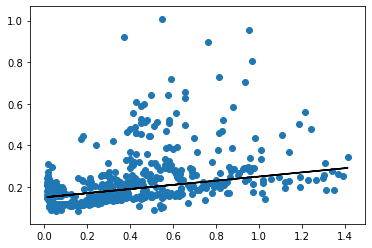

In [0]:
plt.scatter(z_data,error_data)
plt.plot(z_data,.1*z_data+.15,'k-')

In [13]:
np.mean(error_data)

0.22295466913687534

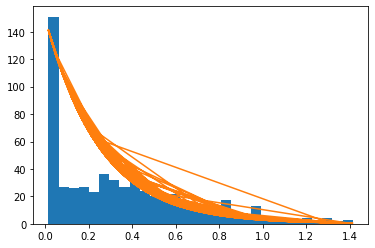

In [14]:
plt.hist(z_data,30)
plt.plot(z_data,150*np.exp(-4.*z_data))

In [0]:
counts, edges = np.histogram(z_data,10)
dz = edges[1]-edges[0]
z_fisher = edges[0:-1] + dz

In [54]:
dm_func(z_fisher, 0.15732655)

array([39.39778705, 40.94732725, 41.91612529, 42.6270055 , 43.18925418,
       43.65405989, 44.04983002, 44.39407791, 44.69840258, 44.97089599])

In [0]:
omegabar = 0.15732655
domega = .005
ddm = (dm_func(z_fisher, omegabar+domega) - dm_func(z_fisher, omegabar-domega))/domega

In [66]:
fisherarg = counts*(ddm**2)/(np.mean(error_data))**2
(np.sum(fisherarg))**(-.5)

0.003227218198980218

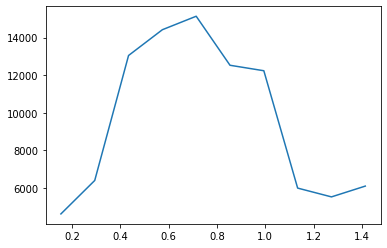

In [67]:
plt.plot(z_fisher,fisherarg)

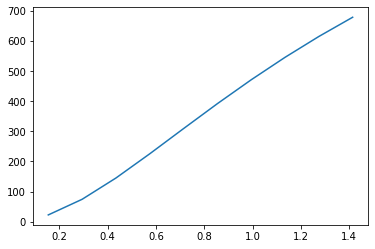

In [68]:
plt.plot(z_fisher,(ddm**2)/(np.mean(error_data))**2)